In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
SST=nc.Dataset('/ihesp/archive/Sunway_Runs/HR_PI_CTRL/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.SST.002101.050112.nc')

In [3]:
plotvarsst = SST.variables['SST'][:,603:808,600:1100]

In [4]:
plotvarsst.shape

(5772, 205, 500)

In [5]:
aveplot1 = plotvarsst.mean(axis=1)

In [6]:
aveplot2 = aveplot1.mean(axis=1)

In [7]:
aveplot2.shape

(5772,)

In [8]:
130*12

1560

In [9]:
new = aveplot2[1560:]

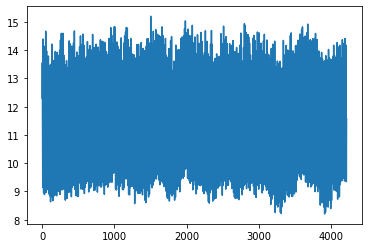

In [10]:
plt.plot(new)

In [11]:
ww2 = np.convolve(new, np.ones((60,))/60, mode='valid')

In [12]:
nn = np.nanmean(ww2)

In [13]:
ww2.shape

(4153,)

findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


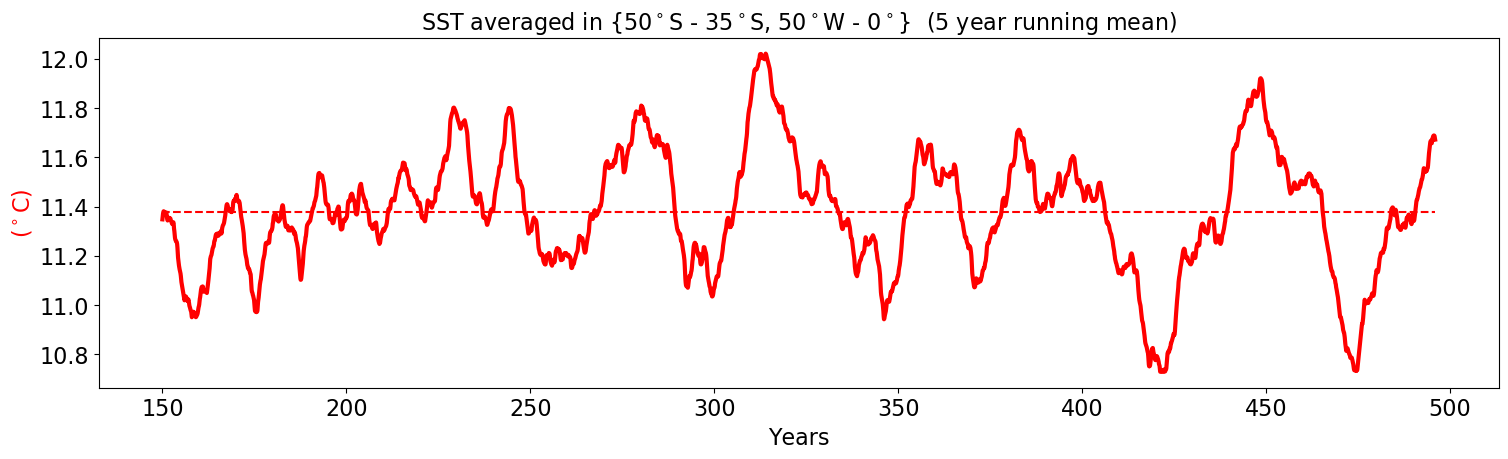

In [14]:
t = np.arange(0,4200,12)
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(20,5), dpi=100)
ax0 = fig.add_axes([0.1,0.1,0.7,0.7])
ax0.plot(ww2,'r',linewidth=3)
plt.hlines(nn, 0, 4150, colors = "red",linestyles = "dashed")
#ax0.plot(tem,'red',linewidth=3)
#########################################

plt.xticks(range(0,4201,600), ['150','200','250','300', '350', '400','450','500'],**my_font)
plt.yticks(**my_font)
plt.xlabel('Years',**my_font)
plt.xlabel('Years',**my_font)
plt.ylabel('($^\circ$C)',color= 'r',**my_font)
plt.axis("tight")
#ax0.set(ylim=(55, 92),xlim=(0, 4170))
ax0.set_title('SST averaged in {50$^\circ$S - 35$^\circ$S, 50$^\circ$W - 0$^\circ$}  (5 year running mean)',**my_font)
plt.savefig("SOM.png",bbox_inches='tight',dpi=fig.dpi)

In [15]:
wspxx = np.loadtxt("wspxx.out")
mrpxx = np.loadtxt("mrpxx.out")
noxx = np.loadtxt("noxx.out")

wspxx = wspxx*12
mrpxx = mrpxx*12
noxx = noxx*12

list_before = wspxx
list_after = [val for val in list_before for i in range(12)]
xxx = np.reshape(list_after,(123,12)) + [0,1,2,3,4,5,6,7,8,9,10,11]-36

list_before = mrpxx
list_after = [val for val in list_before for i in range(12)]
mrpxxx = np.reshape(list_after,(233,12)) + [0,1,2,3,4,5,6,7,8,9,10,11]-36

list_before = noxx
list_after = [val for val in list_before for i in range(12)]
noxxx = np.reshape(list_after,(117,12)) + [0,1,2,3,4,5,6,7,8,9,10,11]-36

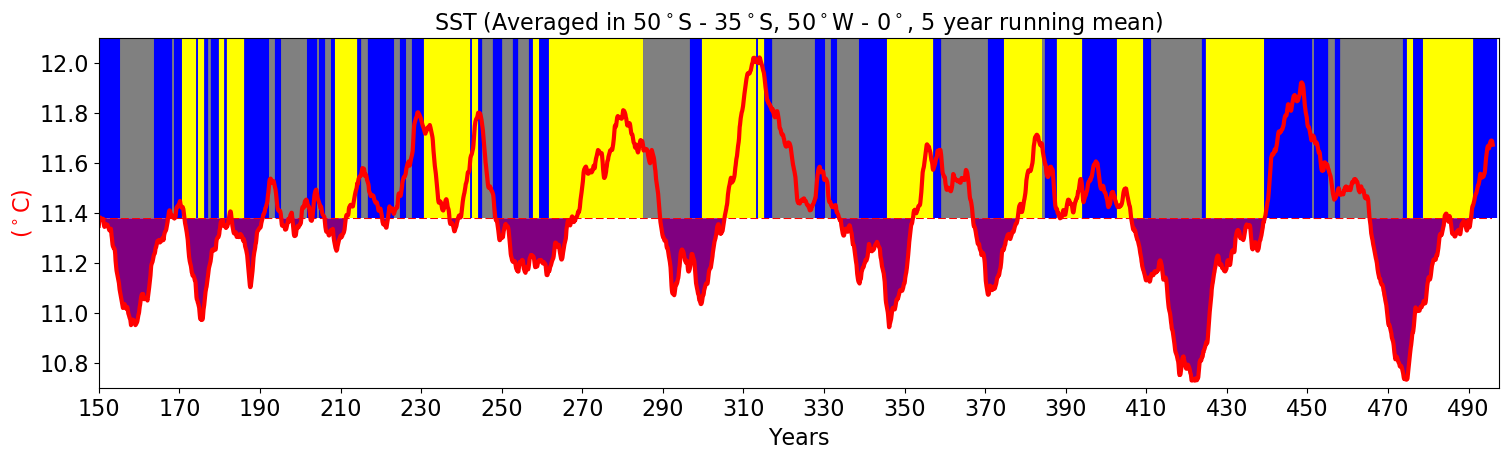

In [42]:
t = np.arange(0,4153,1)
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(20,5), dpi=100)
ax0 = fig.add_axes([0.1,0.1,0.7,0.7])
ax0.plot(ww2,'r',linewidth=3)
plt.hlines(nn, 0, 4150, colors = "red",linestyles = "dashed")
ax0.fill_between(t,nn,ww2,where=ww2 < nn,facecolor='purple', alpha=1)
#ax0.plot(tem,'red',linewidth=3)
#########################################

plt.xticks(range(0,4227,240), ['150','170','190','210','230', '250', '270','290','310','330','350', '370', '390','410','430','450','470','490','500'],**my_font)
#plt.vlines(mrpxxx, 10.8, 12, colors = "purple")

plt.vlines(noxxx, nn, 12.2, colors = "grey")
plt.vlines(mrpxxx, nn, 12.2, colors = "blue")
plt.vlines(xxx, nn, 12.2, colors = "yellow")
plt.yticks(**my_font)
plt.xlabel('Years',**my_font)
plt.xlabel('Years',**my_font)
plt.ylabel('($^\circ$C)',color= 'r',**my_font)
plt.axis("tight")
ax0.set(ylim=(10.7, 12.1),xlim=(0, 4170))
#ax0.set(ylim=(55, 92),xlim=(0, 4170))
ax0.set_title('SST (Averaged in 50$^\circ$S - 35$^\circ$S, 50$^\circ$W - 0$^\circ$, 5 year running mean)',**my_font)
plt.savefig("SOM.png",bbox_inches='tight',dpi=fig.dpi)